In [45]:
import numpy as np
import matplotlib.pyplot as plt
import math, copy

In [81]:
data = np.loadtxt('SOCR-HeightWeight.csv', delimiter=',', usecols=(1,2), skiprows=1)
x_train = data[:500, 0] * 2.54 #converting inches to cm
y_train = data[:500, -1] * 0.45359237 # converting pounds to kg
print(x_train.shape, y_train.shape)
print(x_train[:10], y_train[:10])

(500,) (500,)
[167.0896074 181.6486334 176.2727996 173.270164  172.1810374 174.4925136
 177.2971816 177.8373888 172.472731  169.6271944] [51.25253587 61.90959788 69.41183424 64.56225142 65.45206357 55.92902784
 64.18091632 61.89825807 50.97121788 54.73372123]


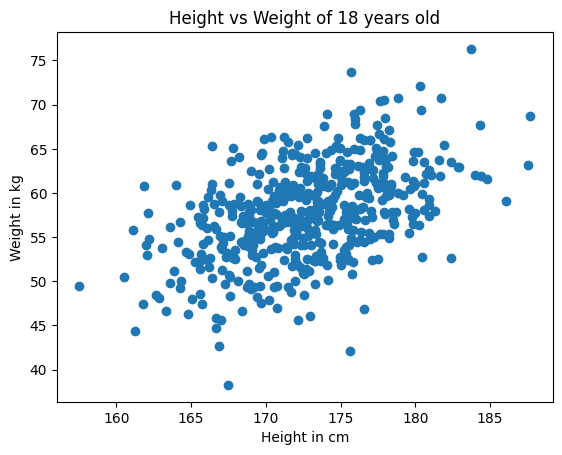

In [82]:
plt.scatter(x_train, y_train)
plt.title('Height vs Weight of 18 years old')
plt.ylabel("Weight in kg")
plt.xlabel('Height in cm')
plt.show()

In [83]:
def compute_cost(x, y, w, b):
    #total_cost = np.sum(np.square(np.add(w*x, b) - y)) / (2*m) # All of this code in one line
    m=x.shape[0]
    total_cost = 0
    for i in range(x.shape[0]):# for each example calculate:
        f_wb = x[i] * w + b # the model's prediction
        cost = (f_wb - y[i])**2 # the cost 
        total_cost += cost
    total_cost = total_cost / (2*m) # and return the total cost over all the examples.
    return total_cost 

In [84]:
def compute_gradient(x, y, w, b):
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0
    for i in range(m): # for each example calculate:
        f_wb = x[i] * w + b #the model's prediction
        dj_dw += (f_wb - y[i]) * x[i] # the gradient for w
        dj_db += f_wb - y[i] # the gradient for b
    return (dj_dw / m), (dj_db / m) # return the total gradient update from all the examples

In [85]:
def gradient_descent(x,y,w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    m = len(x)
    J_history = [] # Arrays for storing cost history - Primarily for graphing later.
    w_history = []
    w = copy.deepcopy(w_in) # avoid modifying global w within function.
    b = b_in
    for i in range(num_iters):#Iterate through this number of iterations and:
        dj_dw, dj_db = gradient_function(x,y,w,b)# Calculate the gradient to update the parameters.
        w = w - alpha*dj_dw # Update the parameters with learning rate (alpha) and its gradient.
        b = b - alpha*dj_db
        if i < 100000: # preven resource exhaustion
            cost = cost_function(x,y,w,b)
            J_history.append(cost)
        if i % math.ceil(num_iters / 10) == 0: # Print cost at intervals 10 times or as many iterations if < 10
            w_history.append(w)
            print(f'Iteration {i:4}: Cost {float (J_history[-1]):8.2f}')
    return w, b, J_history, w_history

In [144]:
initial_w = 0.
initial_b = 0.
w_hist = J_hist = []
w,b, J_hist, w_hist = gradient_descent(x_train, y_train, initial_w, initial_w, compute_cost, compute_gradient, 0.00003, 500000)
# When you have to use a learning rate that is too low could be because you have to scale the features. How do I scale features?
#With z-scale normalization, and mean normalization. When features are normalized, the usual learning rate is 0.01
print(w, b)

Iteration    0: Cost    29.62
Iteration 50000: Cost    11.57
Iteration 100000: Cost    11.57
Iteration 150000: Cost    11.57
Iteration 200000: Cost    11.57
Iteration 250000: Cost    11.57
Iteration 300000: Cost    11.57
Iteration 350000: Cost    11.57
Iteration 400000: Cost    11.57
Iteration 450000: Cost    11.57
0.3366737484694501 -0.426940365010998


In [146]:
m = x_train.shape[0]
predictions = np.zeros(m)
for i in range(m):
    predictions[i] = x_train[i] * w + b
print(w,b)

0.3366737484694501 -0.426940365010998


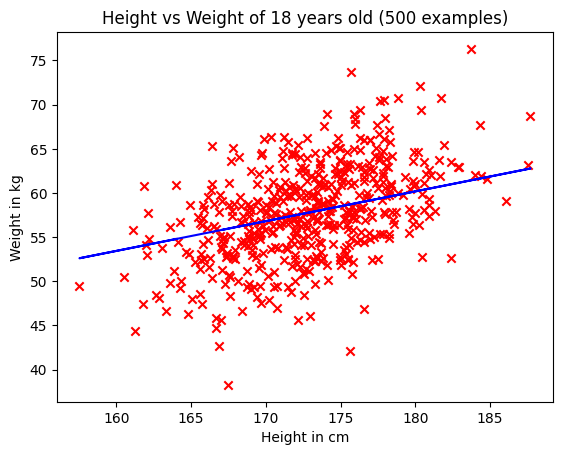

In [151]:
# Now we can plot both predicted targets and actual targets to see if the model fits the data
plt.plot(x_train, predictions, c='b')
plt.scatter(x_train, y_train, marker='x', c='r')
plt.title('Height vs Weight of 18 years old (500 examples)')
plt.xlabel('Height in cm'); plt.ylabel('Weight in kg')
plt.show()

In [153]:
predict1 = w * 178 + b
predict2 = w * 199 + b
predict3 = w * 163 + b
print(f'The weight prediction for a 178 cm person is: {predict1:.3f}')
print(f'The weight prediction for a 199 cm person is: {predict2:.3f}')
print(f'The weight prediction for a 163 cm person is: {predict3:.3f}')

The weight prediction for a 178 cm person is: 59.501
The weight prediction for a 199 cm person is: 66.571
The weight prediction for a 163 cm person is: 54.451


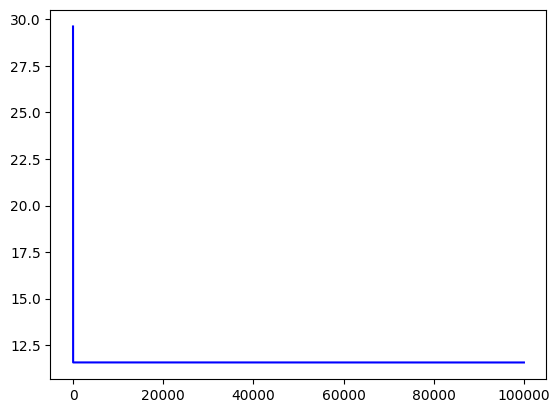

In [150]:
plt.plot(J_hist,c='b')
plt.show()